## Data exploration and visualization

Create a 'Data exploration.ipynb' notebook and perform the following tasks.

In [1]:
import numpy as np
import os
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# Load data
with np.load('cifar4-train.npz', allow_pickle=False) as npz_file:
    cifar4 = dict(npz_file.items())

#let's take a look at the keys
print('Data loaded')
print('It is a dictionary with keys:', list(cifar4.keys()))

Data loaded
It is a dictionary with keys: ['pixels', 'overfeat', 'labels', 'names', 'allow_pickle']


In [2]:
#and inspect the feature names
print('an overview of the data in', list(cifar4.keys())[0], ': ', cifar4['pixels'])

an overview of the data in pixels :  [[255 255 255 ..., 158 145 136]
 [208 216 210 ...,  49  57  78]
 [191 199 207 ...,   3  98 148]
 ..., 
 [254 254 254 ...,  61  56  58]
 [ 61  62  49 ...,  79  86  56]
 [110 108 122 ..., 153 142 146]]


In [3]:
print('an overview of the data in', list(cifar4.keys())[1], ': ', cifar4['overfeat'])

an overview of the data in overfeat :  [[ 3.72460938 -0.38476562  1.58789062 ..., -1.71582031  1.86230469
  -0.68017578]
 [ 3.0859375   0.36206055  0.36206055 ..., -2.31054688  2.9140625
  -1.51171875]
 [ 4.2265625   1.1328125  -1.13085938 ...,  1.60742188 -1.34179688
  -2.3984375 ]
 ..., 
 [ 2.55859375  1.06933594  0.28588867 ..., -1.19238281  0.87451172
  -0.86621094]
 [ 3.28320312  0.70019531  1.18554688 ..., -1.00585938  0.97558594
   1.20605469]
 [ 3.97070312  0.28198242  0.40136719 ..., -1.37597656  2.62304688
  -1.2578125 ]]


In [4]:
print('an overview of the data in', list(cifar4.keys())[2], ': ', cifar4['labels'])

an overview of the data in labels :  [0 1 2 ..., 0 0 1]


In [5]:
print('an overview of the data in', list(cifar4.keys())[2], ': ', cifar4['names'])

an overview of the data in labels :  ['truck' 'car' 'airplane' 'ship']


**Q:** *Print the class distribution, i.e., the proportion of images in each category*

In [6]:
#there's an equal number of images in each of the categories
pd.value_counts(cifar4['labels'], normalize = 'True')

3    0.25
2    0.25
1    0.25
0    0.25
dtype: float64

In [7]:
# Create X/y arrays
X = cifar4['overfeat']
y = cifar4['labels']

print('X:', X.shape, X.dtype)
print('y:', y.shape, y.dtype)

X: (5000, 4096) float32
y: (5000,) int64


In [8]:
# Split data into train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, train_size=4000, test_size=1000, stratify = y, random_state=0)

In [9]:
#let's make sure of the uniform distribution of the data in the train set
pd.value_counts(y_tr, normalize = 'True')

3    0.25
1    0.25
2    0.25
0    0.25
dtype: float64

**Q:** *What is the accuracy of the "most-frequent" baseline?*

In [10]:
# Create the dummy classifier
mf_dummy = DummyClassifier(strategy='most_frequent')

# Fit it to the train data
mf_dummy.fit(X_tr, y_tr)

# Compute accuracy on the test set
mf_accuracy = mf_dummy.score(X_te, y_te)
print('Baseline accuracy: {:.3f}'.format(mf_accuracy))

Baseline accuracy: 0.250


**Q:** *Plot a few images from the data set, e.g., ten images from each category*

Label: 0


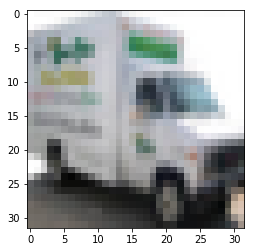

Label: 0


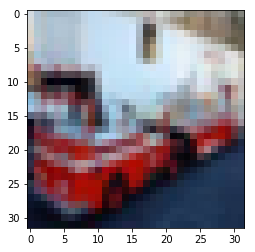

Label: 0


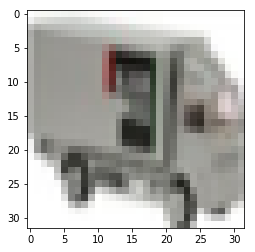

Label: 0


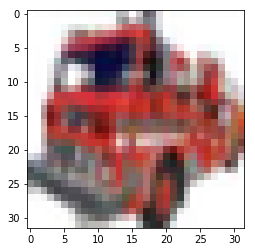

Label: 0


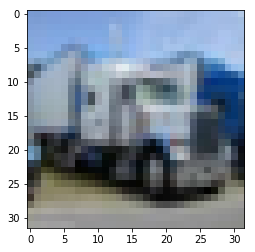

Label: 0


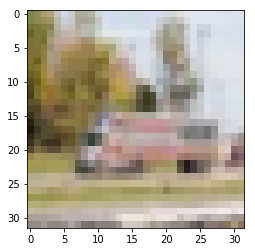

Label: 0


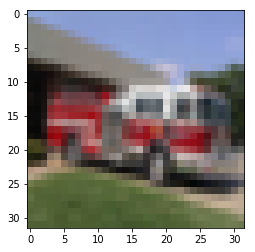

Label: 0


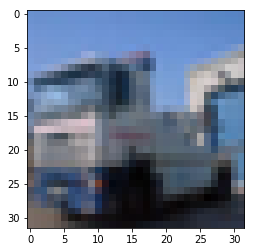

Label: 0


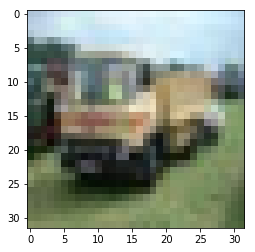

Label: 0


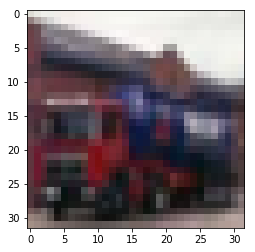

Label: 1


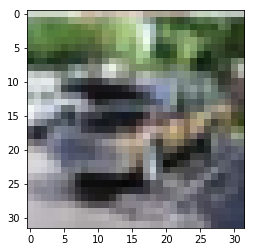

Label: 1


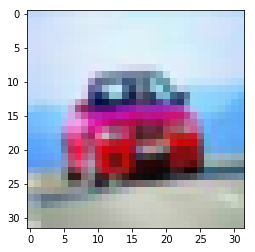

Label: 1


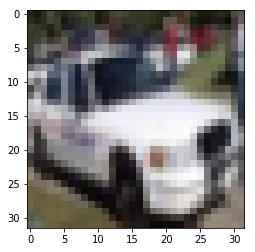

Label: 1


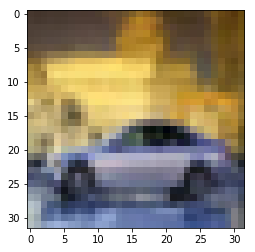

Label: 1


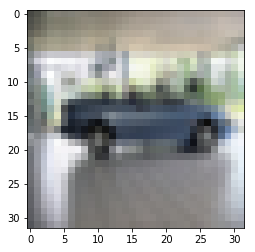

Label: 1


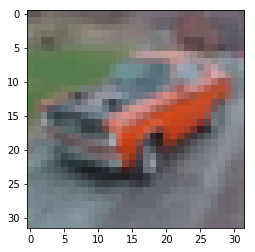

Label: 1


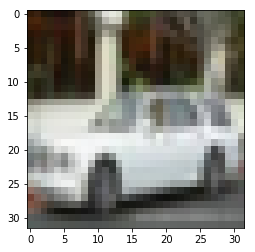

Label: 1


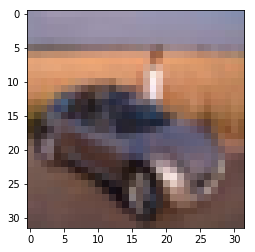

Label: 1


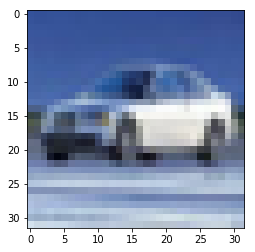

Label: 1


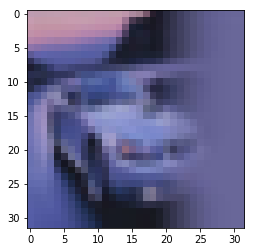

Label: 2


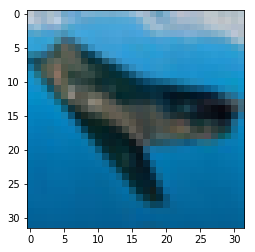

Label: 2


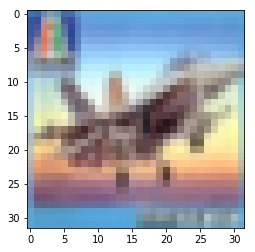

Label: 2


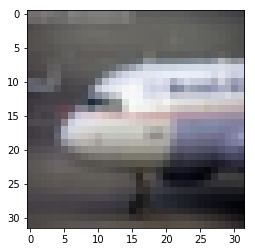

Label: 2


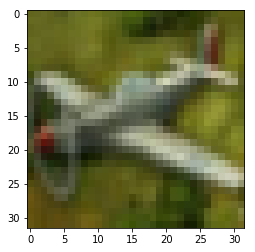

Label: 2


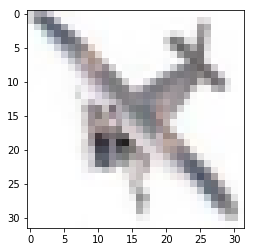

Label: 2


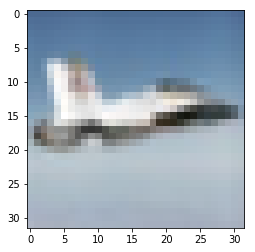

Label: 2


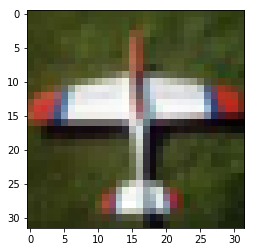

Label: 2


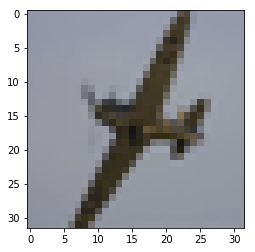

Label: 2


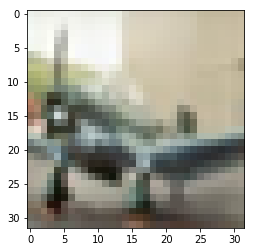

Label: 2


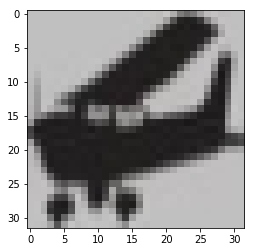

Label: 3


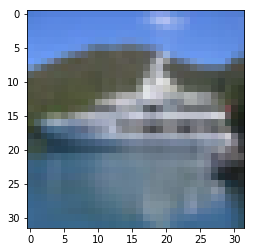

Label: 3


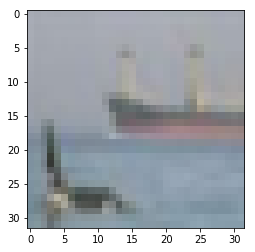

Label: 3


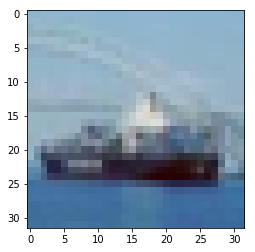

Label: 3


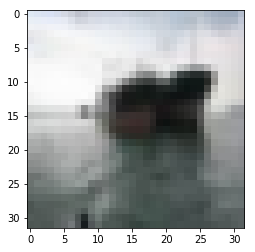

Label: 3


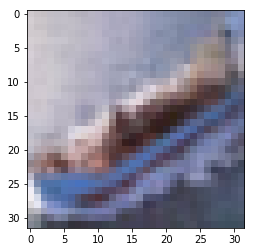

Label: 3


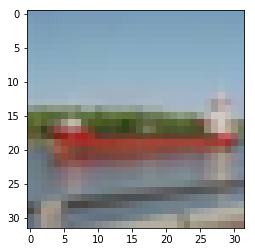

Label: 3


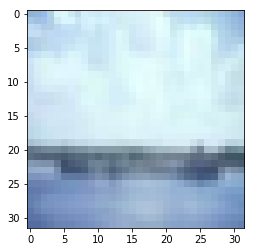

Label: 3


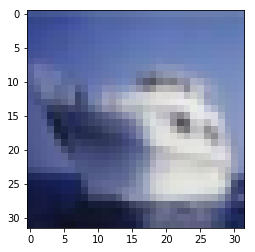

Label: 3


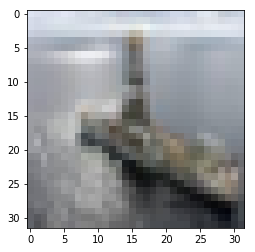

Label: 3


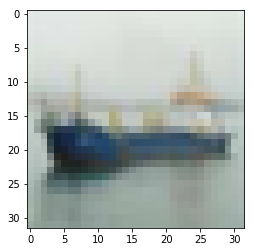

In [11]:
# Function to plot the i-th image from some X/y arrays
def show_image(item, X, category):
    # Get image pixels from the input matrix X
    idx = category_list[(category, item)].astype(int)
    flat_img = X[idx] # has shape (3072,)
    
   # Reshape the "flat vector" into a 32x32x3 array 
    img = flat_img.reshape(32, 32, 3)
    
    # Print label using the output vector y
    print('Label:', category)
    
    # Plot image with pyplot
    plt.imshow(img, cmap=plt.cm.gray_r)
    plt.show()
    
#Load the pixels into a variable
pixels = cifar4['pixels']

#store 10 items of each category in a list to be printed later
counter = 0
category_counter = [0] * 4
category_list = np.zeros((4,10))
while 1:
    if category_counter[cifar4['labels'][counter]] < 10:
        category_list[(cifar4['labels'][counter], category_counter[cifar4['labels'][counter]])] = counter
        category_counter[cifar4['labels'][counter]] += 1
    for check_counter in np.arange(4):
        if category_counter[cifar4['labels'][check_counter]] < 10:
            finished = 0
    if finished == 1:
        break
    finished = 1
    counter += 1
    
# Show the stored image items
for category_counter in np.arange(4):
    for item_counter in np.arange(10):
        show_image(item_counter, pixels, category_counter)

**Q:** *Create a scree plot of the* **OverFeat Features**

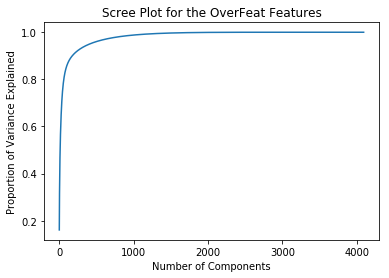

In [12]:
# Compute the principal components
pca = PCA(n_components=None)

# Create Standard scaler
scaler = StandardScaler()

# let's re-scale the data to be used by PCA
X_rescaled = scaler.fit_transform(X)
pca.fit(X_rescaled)

# calculate the proportion of variance explained (PVE)
pve = pca.explained_variance_ratio_

# let's generate the scree plot for the OverFeat Features
# as mentioned in the project instructions, the first one hundred entries give enogh dimensionalities
plt.plot(np.cumsum(pve))
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot for the OverFeat Features')

**Q:** *What is the cumulated proportion of variance explained (PVE) in the first two components?*

In [13]:
np.cumsum(pve)[1]

0.23541817

**Q:** *How many components should we keep to retain 80%, 90%, 95% and 99% of the variance explained?*

In [14]:
n_component_80 = 0
n_component_90 = 0
n_component_95 = 0
n_component_99 = 0

for component_counter in np.arange(pve.shape[0]):
    if n_component_80 == 0 and np.cumsum(pve)[component_counter] > 0.8:
        n_component_80 = component_counter + 1
    if n_component_90 == 0 and np.cumsum(pve)[component_counter] > 0.9:
        n_component_90 = component_counter + 1
    if n_component_95 == 0 and np.cumsum(pve)[component_counter] > 0.95:
        n_component_95 = component_counter + 1
    if n_component_99 == 0 and np.cumsum(pve)[component_counter] > 0.99:
        n_component_99 = component_counter + 1

print('Number of cumponents retained for:')
print('80% of PVE ->', n_component_80)
print('90% of PVE ->', n_component_90)
print('95% of PVE ->', n_component_95)
print('99% of PVE ->', n_component_99)

Number of cumponents retained for:
80% of PVE -> 62
90% of PVE -> 176
95% of PVE -> 408
99% of PVE -> 1072


**Finally, apply PCA to create 2d plots of the input data**

**Q:** *Create a 2d plot of the OverFeat features*

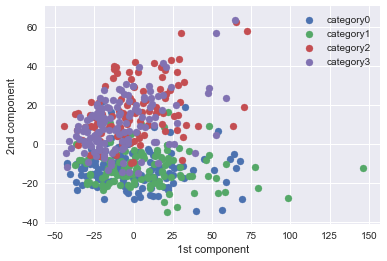

In [18]:
# create a PCA transformer to find out the two principal components
pca2 = PCA(n_components=2)

# Apply PCA
pca2.fit(X_rescaled)

# project 500 of the data onto the first two components
X_rescaled_2d = pca2.transform(X_rescaled[:500])

# activate Seaborn style
sns.set()

# plot each category
for category_counter in [0, 1, 2, 3]:
    #categories of this type
    idx = (y[:500] == category_counter)
    
    #plot their components
    plt.scatter(
        X_rescaled_2d[idx, 0], X_rescaled_2d[idx, 1],
        label = 'category{}'.format(category_counter)
    )

# labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

**Q:** *Write your observations in a markdown cell under the plot*

**A:** It seems to be outliers in the **OverFeat Features** data specially concerning the *car category*.

**Q:** *Create a 2d plot of the matrix of image pixels*

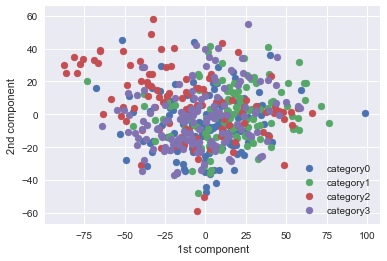

In [30]:
# let's re-scale the data to be used by PCA
pixels_rescaled = scaler.fit_transform(pixels.astype(float))

# Apply PCA
pca2.fit(pixels_rescaled)

# project 500 of the data onto the first two components
pixels_rescaled_2d = pca2.transform(pixels_rescaled[:500])

# plot each category
for category_counter in [0, 1, 2, 3]:
    #categories of this type
    idx = (y[:500] == category_counter)
    
    #plot their components
    plt.scatter(
        pixels_rescaled_2d[idx, 0], pixels_rescaled_2d[idx, 1],
        label = 'category{}'.format(category_counter)
    )

# labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

**Q:** *Write your observations in a markdown cell under the plot*

**A:** The pixel data seems to have very few outliers while on the other hand, it seems that no specific relation is available between the 1st and 2nd data components.